<h1>Operating cost</h1>

The cost of producing a chemical product will include the items listed below. They are
divided into two groups.
1. Fixed operating costs: costs that do not vary with production rate. These are the bills that have to be paid whatever the quantity produced.
2. Variable operating costs: costs that are dependent on the amount of product produced.


<h2>Fixed cost</h2>

Fixed cost consider:
<ol>
    <li>Maintenance (labour and materials): typically 5 to 15 per cent of the installed capital costs</li>
    <li>Utilities (Services)</li>
         <ol>
            <li>Power</li>
            <li>Cooling and process water</li>
        </ol>
    <li>Taxes </li>
    <li>Operation labour: Should be calculated from an estimate of the number of shift and day personnel needed, should include:</li>
        <ol>
            <li>Vacaciones</li>
            <li>Aguinaldo</li>
            <li>Prima vacacional</li>
            <li>IMSS</li>
            <li>INFONAVIT</li>
        </oll>
</li>
</ol>





<h3>Maintenace</h3>

In [406]:
class Maintenance:
    def __init__(self, installed_capital_cost):
        self.installed_capital_cost = installed_capital_cost
        self.calculate_maintenance_cost()

    def calculate_maintenance_cost(self):
        self.maintenance_cost=self.installed_capital_cost * 0.12
        return self.maintenance_cost
     

compresores=229971 #USD total
tanques=190000000 #USD total

total_equipos=(compresores+tanques)*19
Main_total = Maintenance(total_equipos)
Main_total.maintenance_cost
print("El costo de mantenimiento es: ${:,.2f}".format(Main_total.maintenance_cost),"MNX al año")

El costo de mantenimiento es: $433,724,333.88 MNX al año


<h3>Utilities</h3>

**Power**

In [407]:
"""Considerando que deacuero con datos de la CFE, el precio de la energia es del 1.4764 $/kWh  en punta para el estado de baja California, municipio de Mexicali"""
"""Referencia: https://app.cfe.mx/Aplicaciones/CCFE/Tarifas/TarifasCREIndustria/Tarifas/DemandaIndustrialSub.aspx"""

def energy_cost(energy_kwh):
    price_per_kwh = 1.4764  # Price in $/kW
    total_cost = energy_kwh * price_per_kwh*365 # Total cost for a year
    #Agregar distribucion y capacidad de la CFE
    return total_cost
energy=625.493254 #kw
Power_total=energy_cost(energy) 
print("El costo de energia es: ${:,.2f}".format(Power_total),"MNX al año")


El costo de energia es: $337,069.56 MNX al año


**Cooling water**

In [408]:
#SERVICIO INDUSTRIAL MEDIDO
#tarifa de industrial con cuotas de Baja california 
#https://www.oosapascomondu.gob.mx/index.php/servicios/Cuotas


def water_cost(water):
    price_per_m3=39.16 #MNX
    water_m3=water*1000 #Convertir de L a m3
    CWater_total = water_m3 * price_per_m3
    return CWater_total 

########## costos de agua 
#water_total=water_cost(1000) #Replace with your input value
#water_total

<h3>Operating labour</h3>

In [409]:
import pandas as pd
trabajo = {
    "Personal": ["Ingeniero de procesos", 
                 "Operadores de planta ", 
                 "Personal Técnico y de Mantenimiento mecánico",
                 "Ingeniero de seguridad de procesos",
                 "Administrador/a general",
                 "Responsable de recursos humanos",
                 "Ingeniero ambiental",
                 "Personal de intendendia industrial"],
    "Cantidad de personal": [2,
                             4,
                             2,
                             1,
                             1,
                             2,
                             1,
                             2],
    "Salario c/u": [30000,
                    9000,
                    11000,
                    25000,
                    20000,
                    20000,
                    25000,
                    8000],
}

#Dataframe creation and calculations of the salary per month and year
recursos_humano = pd.DataFrame(trabajo)

#modificaciones de la tabla
recursos_humano["Salario total (MNX/mes)"] = recursos_humano["Cantidad de personal"] * recursos_humano["Salario c/u"]
recursos_humano["Salario total (MNX/año)"] = recursos_humano["Salario total (MNX/mes)"] * 12 #meses de trabajo al año
recursos_humano["Vacaciones (MNX/año)"]=(recursos_humano["Salario c/u"]/30*6)*recursos_humano["Cantidad de personal"]# LFT establece un mínimo de 6 días de vacaciones anuales. Este número aumenta en 2 días por cada año de servicio, hasta un máximo de 20 días. En este caso, se considera un mínimo de 6 días para todos los trabajadores.
recursos_humano["Aguinaldo (MNX/año)"]=(recursos_humano["Salario c/u"]/30*15)*recursos_humano["Cantidad de personal"]#La LFT establece un aguinaldo equivalente a 15 días de salario
recursos_humano["Prima Vacacional (MNX/año)"]=(recursos_humano["Salario c/u"]/30*12*0.25)*recursos_humano["Cantidad de personal"]#La LFT también establece una prima vacacional del 25% del salario por cada día de vacaciones
##calculo de prestaciones IMSS e INFONAVIT
##El salario base de cotización (SBC) es el salario diario integrado que se utiliza para calcular las aportaciones al IMSS y al INFONAVIT.
recursos_humano["Salario base de cotización (SBC/cu/diario)"]=(recursos_humano["Salario c/u"]/30)+((recursos_humano["Vacaciones (MNX/año)"]/recursos_humano["Cantidad de personal"])+(recursos_humano["Aguinaldo (MNX/año)"]/recursos_humano["Cantidad de personal"])+(recursos_humano["Prima Vacacional (MNX/año)"]/recursos_humano["Cantidad de personal"]))/365
##El IMSS establece una tasa de aportación del 26% sobre el SBC para el seguro de enfermedades y maternidad, riesgos de trabajo, guarderías y prestaciones sociales.
recursos_humano["IMSS/mes"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"]*30*0.26 *recursos_humano["Cantidad de personal"]
##El INFONAVIT establece una tasa de aportación del 5% sobre el SBC para el fondo de vivienda.
recursos_humano["INFONAVIT/mes"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"]*30*0.05 *recursos_humano["Cantidad de personal"]

recursos_humano["IMSS/año"] = recursos_humano["IMSS/mes"]*12 #12 meses al año
recursos_humano["INFONAVIT/año"] = recursos_humano["INFONAVIT/mes"]*12 #12 meses al año
## IMPUESTOS
recursos_humano["ISN (MXN/año)"] =(recursos_humano["Salario total (MNX/año)"]+recursos_humano["Vacaciones (MNX/año)"]+recursos_humano["Aguinaldo (MNX/año)"]+recursos_humano["Prima Vacacional (MNX/año)"])*0.018


##sumar todo los datos del los cotos de personal
recursos_humano.loc["Total"] = recursos_humano[["Cantidad de personal", "Salario c/u", "Salario total (MNX/mes)","Salario total (MNX/año)",
                                                "Vacaciones (MNX/año)","Aguinaldo (MNX/año)","Prima Vacacional (MNX/año)","IMSS/año","INFONAVIT/año","IMSS/mes","INFONAVIT/mes", "ISN (MXN/año)"]].replace('[\$,]', '', regex=True).astype(float).sum()
recursos_humano.loc["Total", "Personal"] = "Total"


##Guardar valores para que se mantengan con numero y poder hacer operacion con ellos 
total_anual=recursos_humano.iloc[-1]["Salario total (MNX/año)"]
total_vacaciones_anual=recursos_humano.iloc[-1]["Vacaciones (MNX/año)"]
total_aguinaldo_anual=recursos_humano.iloc[-1]["Aguinaldo (MNX/año)"]     
total_prima_vacacional_anual=recursos_humano.iloc[-1]["Prima Vacacional (MNX/año)"]
total_IMSS_anual=recursos_humano.iloc[-1]["IMSS/año"]
total_INFONAVIT_anual=recursos_humano.iloc[-1]["INFONAVIT/año"]
tax_total=recursos_humano.iloc[-1]["ISN (MXN/año)"]
 

##Formato de la tabla
recursos_humano["Salario total (MNX/mes)"] = recursos_humano["Salario total (MNX/mes)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario total (MNX/año)"] = recursos_humano["Salario total (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Aguinaldo (MNX/año)"] = recursos_humano["Aguinaldo (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Vacaciones (MNX/año)"] = recursos_humano["Vacaciones (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Prima Vacacional (MNX/año)"] = recursos_humano["Prima Vacacional (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario c/u"] = recursos_humano["Salario c/u"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario base de cotización (SBC/cu/diario)"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["IMSS/mes"] = recursos_humano["IMSS/mes"].apply(lambda x: f"${x:,.2f}")
recursos_humano["INFONAVIT/mes"] = recursos_humano["INFONAVIT/mes"].apply(lambda x: f"${x:,.2f}")
recursos_humano["IMSS/año"] = recursos_humano["IMSS/año"].apply(lambda x: f"${x:,.2f}")
recursos_humano["INFONAVIT/año"] = recursos_humano["INFONAVIT/año"].apply(lambda x: f"${x:,.2f}")
recursos_humano["ISN (MXN/año)"] = recursos_humano["ISN (MXN/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano

,Personal,Cantidad de personal,Salario c/u,Salario total (MNX/mes),Salario total (MNX/año),Vacaciones (MNX/año),Aguinaldo (MNX/año),Prima Vacacional (MNX/año),Salario base de cotización (SBC/cu/diario),IMSS/mes,INFONAVIT/mes,IMSS/año,INFONAVIT/año,ISN (MXN/año)
0,Ingeniero de procesos,2.0,"$30,000.00","$60,000.00","$720,000.00","$12,000.00","$30,000.00","$6,000.00","$1,065.75","$16,625.75","$3,197.26","$199,509.04","$38,367.12","$13,824.00"
1,Operadores de planta,4.0,"$9,000.00","$36,000.00","$432,000.00","$7,200.00","$18,000.00","$3,600.00",$319.73,"$9,975.45","$1,918.36","$119,705.42","$23,020.27","$8,294.40"
2,Personal Técnico y de Mantenimiento mecánico,2.0,"$11,000.00","$22,000.00","$264,000.00","$4,400.00","$11,000.00","$2,200.00",$390.78,"$6,096.11","$1,172.33","$73,153.32","$14,067.95","$5,068.80"
3,Ingeniero de seguridad de procesos,1.0,"$25,000.00","$25,000.00","$300,000.00","$5,000.00","$12,500.00","$2,500.00",$888.13,"$6,927.40","$1,332.19","$83,128.77","$15,986.30","$5,760.00"
4,Administrador/a general,1.0,"$20,000.00","$20,000.00","$240,000.00","$4,000.00","$10,000.00","$2,000.00",$710.50,"$5,541.92","$1,065.75","$66,503.01","$12,789.04","$4,608.00"
5,Responsable de recursos humanos,2.0,"$20,000.00","$40,000.00","$480,000.00","$8,000.00","$20,000.00","$4,000.00",$710.50,"$11,083.84","$2,131.51","$133,006.03","$25,578.08","$9,216.00"
6,Ingeniero ambiental,1.0,"$25,000.00","$25,000.00","$300,000.00","$5,000.00","$12,500.00","$2,500.00",$888.13,"$6,927.40","$1,332.19","$83,128.77","$15,986.30","$5,760.00"
7,Personal de intendendia industrial,2.0,"$8,000.00","$16,000.00","$192,000.00","$3,200.00","$8,000.00","$1,600.00",$284.20,"$4,433.53",$852.60,"$53,202.41","$10,231.23","$3,686.40"
Total,Total,15.0,"$148,000.00","$244,000.00","$2,928,000.00","$48,800.00","$122,000.00","$24,400.00",$nan,"$67,611.40","$13,002.19","$811,336.77","$156,026.30","$56,217.60"


In [410]:
totals = {
    "Concepto": ["Total salarial anual", "Total vacaciones anual", "Total aguinaldo anual", 
                 "Total prima vacacional anual", "Total IMSS anual", "Total INFONAVIT anual"],
    "Monto (MNX/año)": [total_anual, total_vacaciones_anual, total_aguinaldo_anual, 
                    total_prima_vacacional_anual, total_IMSS_anual, total_INFONAVIT_anual]
}
final = pd.DataFrame(totals)
final.loc["Total"]= final[["Monto (MNX/año)"]].replace('[\$,]', '', regex=True).astype(float).sum()
OL_total = final.iloc[-1]["Monto (MNX/año)"]
final.loc["Total", "Concepto"] = "Total"
final["Monto (MNX/año)"] = final["Monto (MNX/año)"].apply(lambda x: f"${x:,.2f}")


final

,Concepto,Monto (MNX/año)
0,Total salarial anual,"$2,928,000.00"
1,Total vacaciones anual,"$48,800.00"
2,Total aguinaldo anual,"$122,000.00"
3,Total prima vacacional anual,"$24,400.00"
4,Total IMSS anual,"$811,336.77"
5,Total INFONAVIT anual,"$156,026.30"
Total,Total,"$4,090,563.07"


<h3>Taxes</h3>

 Las personas físicas y Morales están obligados al pago de **impuestos sobre la renta**. De acuerdo con el artículo 9 ley las personas morales deben de aplicar la tasa del 30%


**El Impuesto Sobre Nómina (ISN)** es un impuesto estatal que deben pagar las empresas por los pagos que hacen a sus trabajadores. Se calcula como un porcentaje del total de los pagos realizados por concepto de sueldos, salarios y otras prestaciones laborales. 
**Para el caso específico del estado de Baja California se considera una tarifa del 1.8%**

In [411]:
#cálculo del impuesto sobre la Nómina
recursos_humano[["Salario total (MNX/año)","Vacaciones (MNX/año)","Prima Vacacional (MNX/año)" ,"Aguinaldo (MNX/año)","ISN (MXN/año)"]]


,Salario total (MNX/año),Vacaciones (MNX/año),Prima Vacacional (MNX/año),Aguinaldo (MNX/año),ISN (MXN/año)
0,"$720,000.00","$12,000.00","$6,000.00","$30,000.00","$13,824.00"
1,"$432,000.00","$7,200.00","$3,600.00","$18,000.00","$8,294.40"
2,"$264,000.00","$4,400.00","$2,200.00","$11,000.00","$5,068.80"
3,"$300,000.00","$5,000.00","$2,500.00","$12,500.00","$5,760.00"
4,"$240,000.00","$4,000.00","$2,000.00","$10,000.00","$4,608.00"
5,"$480,000.00","$8,000.00","$4,000.00","$20,000.00","$9,216.00"
6,"$300,000.00","$5,000.00","$2,500.00","$12,500.00","$5,760.00"
7,"$192,000.00","$3,200.00","$1,600.00","$8,000.00","$3,686.40"
Total,"$2,928,000.00","$48,800.00","$24,400.00","$122,000.00","$56,217.60"


<h2>Variable cost</h2>

<p>Variable costs consider:</p>
<ol>
    <li>Miscellaneous operating materials:
        <ol>
            <li>Safety clothing: hard hats, safety glasses etc.</li>
        
</ol>

In [412]:
import pandas as pd

data = {
    "Concepto": ["Artículos de oficinas", "Material de seguridad"],
    "Descripción": ["Hojas, carpetas, bolígrafos, etc.", 
                    "Botas de seguridad, casco, googles de seguridad, guantes y otros EPP"],
    "Costo (MNX)": ["$10,000.00", "$20,000.00"]
}

# Create the DataFrame
table = pd.DataFrame(data)

# Add a total row
table['Costo (MNX)'] = table['Costo (MNX)'].replace('[\$,]', '', regex=True).astype(float)
table.loc["Total"] = ["Total", "", f"${table['Costo (MNX)'].sum():,.2f}"]

# Display the table
cv_total = table.iloc[-1]["Costo (MNX)"].replace('$', '').replace(',', '')
cv_total = float(cv_total)
#cv_total
table

,Concepto,Descripción,Costo (MNX)
0,Artículos de oficinas,"Hojas, carpetas, bolígrafos, etc.",10000.0
1,Material de seguridad,"Botas de seguridad, casco, googles de segurida...",20000.0
Total,Total,,"$30,000.00"


<h1>Punto de equilibrio</h1>

In [413]:
Cfijos_totales=OL_total+tax_total+Power_total+Main_total.maintenance_cost #suma de todos los costos fijos
Cfijos_totales #total de costos fijos al año 
print("costos fijos totales: ${:,.2f}".format(Cfijos_totales), "MNX al año")


costos fijos totales: $438,208,184.11 MNX al año


In [414]:
n_unidades= 4*365 #ton por año
Cvariable=cv_total/n_unidades #costo variable por tonelada
print("costos variables unitarios: ${:,.2f}".format(Cvariable), "MNX al año")


costos variables unitarios: $20.55 MNX al año


In [415]:
#precio de venta unitario.
# https://www.elfinanciero.com.mx/empresas/2021/05/12/conforme-suba-el-costo-del-gas-natural-el-hidrogeno-verde-entrara-en-precios-competitivos-rosa-gonzalez-investigadora-del-ipn/

PVU= 6.5 #5 usd por kg
PVU = PVU * 1000  # Convertir de USD por kg a USD por tonelada
PVU=PVU*19.45 #conversion de USD a MNX

#calculo  del punto de equilibrio 
PE= (Cfijos_totales/(PVU-Cvariable)) #punto de equilibrio en toneladas
PE=PE/365
print("El punto de equilibrio es: {:.2f}".format(PE), "toneladas al día") 


El punto de equilibrio es: 9.50 toneladas al día


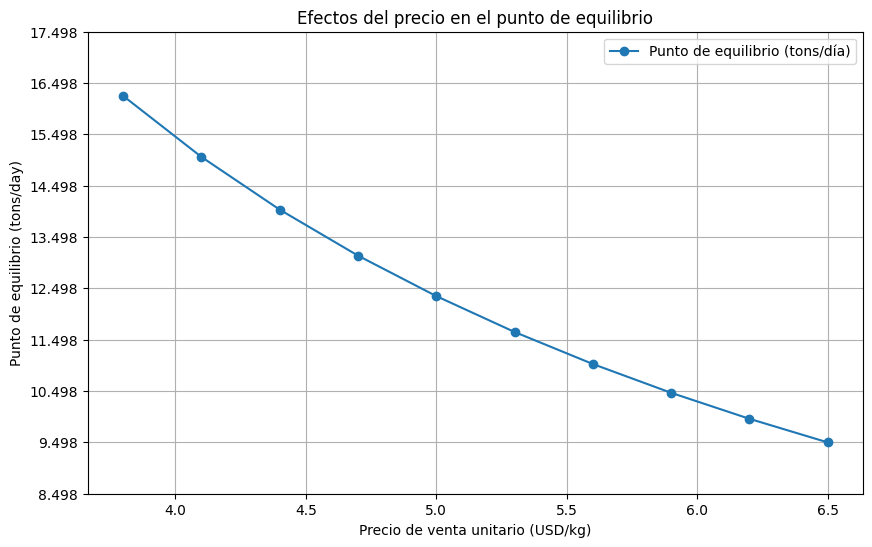

In [416]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a list of 10 elements between 3.8 and 6.5
PVU_list = np.linspace(3.8, 6.5, 10)

# Function to calculate equilibrium point (PE)
def calculate_PE(PVU_list, Cfijos_totales, Cvariable):
    PE_list = []
    for PVU in PVU_list:
        PVU_MNX = PVU * 1000 * 19.45  # Convert USD/kg to MNX/ton
        PE = Cfijos_totales / (PVU_MNX - Cvariable)
        PE_list.append(PE / 365)  # Convert to tons per day
    return PE_list

# Calculate PE for the list of PVU
PE_list = calculate_PE(PVU_list, Cfijos_totales, Cvariable)


plt.figure(figsize=(10, 6))
plt.plot(PVU_list, PE_list, marker='o', label="Punto de equilibrio (tons/día)")
plt.title("Efectos del precio en el punto de equilibrio")
plt.xlabel("Precio de venta unitario (USD/kg)")
plt.ylabel("Punto de equilibrio (tons/day)")
plt.grid()


plt.yticks(np.arange(min(PE_list) - 1, max(PE_list) + 2, 1))

plt.legend()
plt.show()

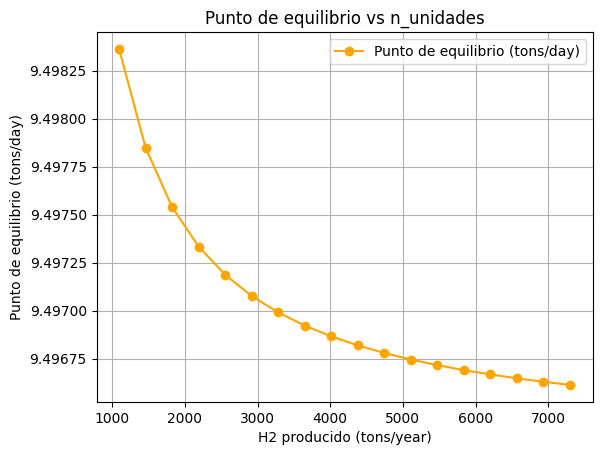

In [417]:
# Generate a list of n_unidades values from 3 to 20, multiplied by 365
n_unidades_list = [i * 365 for i in range(3, 21)]

# Fixed price in USD
PVU = 6.5  # USD/kg
PVU_MNX = PVU * 1000 * 19.45  # Convert USD/kg to MNX/ton

# Calculate Cvariable and PE for each n_unidades
Cvariable_list = []
PE_list = []

for n in n_unidades_list:
    Cvariable = cv_total / n  # Calculate variable cost per ton
    PE = Cfijos_totales / (PVU_MNX - Cvariable)  # Calculate equilibrium point in tons/year
    Cvariable_list.append(Cvariable)
    PE_list.append(PE / 365)  # Convert to tons/day

# Plot the results
# Plot PE
plt.plot(n_unidades_list, PE_list, marker='o', color='orange', label="Punto de equilibrio (tons/day)")
plt.title("Punto de equilibrio vs n_unidades")
plt.xlabel("H2 producido (tons/year)")
plt.ylabel("Punto de equilibrio (tons/day)")
plt.grid()
plt.legend()